/data/dotfiles_xy/nvim/plugged/tutorials/beginner_source/nlp/word_embeddings_tutorial.py 

In [1]:
at

'%load_ext autoreload \n %autoreload 2'

In [2]:
# %%file diaodu/preprocess.py
#### import and reading data
import pandas as pd
import numpy as np
import random
import torch.nn as nn
import torch.optim as optim
import torch
import gc
from funtest.test_pathlib import first_try
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(2018)
%matplotlib inline
import sys
# sys.path.append('/opt/playground/web_traffic/')
# from util import threed_view
# from threed_view import *# from util import threed_view
sys.path.append('/opt/playground/diaodu/')
from dst import *
from model import *
sys.path.append('/opt/playground/diaodu/util')
from gen_expand import *
from threed_view import *
from meter import AverageMeter
import random
from preprocess import Preprocess
from preprocess import en_vec
torch.manual_seed(random.randint(1,2888))

In [59]:
%%file diaodu/preprocess.py
import pandas as pd
class Preprocess():
    def __init__(self):
        self.data_read()
    def data_read():
        base='/mnt/osstb/tianchi/diaodu/'

        fn=first_try(base,'*.csv')

        col_li_aid='aid_cpu_mem_disk_p_m_pm'
        col_li_mid='mid_cpu_mem_disk_p_m_pm'
        col_li_aid=col_li_aid.split('_')
        col_li_mid=col_li_mid.split('_')

        self.df_app_inter=pd.read_csv(fn[0],names=['aid','bid','v'],usecols=None,index_col=None)

        self.df_app_res=pd.read_csv(fn[1],names=list('abcdefg'))

        self.df_app_res=pd.read_csv(fn[1],names=col_li_aid)

        self.df_ins=pd.read_csv(fn[2],names=['iid','aid','mid'])

        self.df_machine=pd.read_csv(fn[3],names=col_li_mid)

        self.df_su=pd.read_csv(fn[4])

# df_app_res['aid']=df_app_res.aid.str.split('_',expand=True)[1]
    def df_app_res_handling(self):
        for c in ['cpu','mem']:
            self.df_app_res=pd.concat( [df_app_res,df_app_res[c].str.split('|',expand=True)],axis=1)
    def df_machine_handling(self):
        cols=['cpu','mem','disk','p','m','pm']
        cols_rn=[]
        for c in cols:
            val_map={each:str(id) for id,each in enumerate(df_machine[c].unique())}
            c_rn='_'.join([c,'en'])
            cols_rn.append(c_rn)
            self.df_machine[c_rn]=self.df_machine[c].map(val_map)

        self.df_machine[cols_rn].sum(axis=1).value_counts()

        self.df_machine['target']=self.df_machine[cols_rn].sum(axis=1)

        self.df_machine['target']
        val_map={each:id for id,each in enumerate(self.df_machine.target.unique())}
        self.df_machine['target']=self.df_machine['target'].map(val_map)

    def make_vector(self,aids):
        vec=np.zeros(df_ins.aid.nunique())



        for id,values in zip(aids.bid,aids.v):
            index=int(id.split('_')[-1])-1
    #         vec[int(id.split('_')[-1])-1]+=values
    #         if id=='app_8129':
    #             print(id,values)
    #             print(vec.max())
            vec[index]+=values
        if len(np.argwhere(vec==7))>0:
            print('----------')
            print(np.argwhere(vec==7))
        vec=vec.astype(int)
    #     return pd.Series([''.join(vec.astype(str)),vec.max()],index=['vec','vec_max'])
        return pd.Series([(vec==7)*vec.T,(vec==5)*vec.T,(vec==4)*vec.T,(vec==3)*vec.T,(vec==1)*vec.T],
                         index['vec7','vec5','vec4','vec3','vec1'])
    def df_app_inter_handling(self):
        nonly=self.df_ins.aid.nunique()
        def make_vector(nonly,aids):
            vec=np.zeros(nonly)

            for id,values in zip(aids.bid,aids.v):
                index=int(id.split('_')[-1])-1
        #         vec[int(id.split('_')[-1])-1]+=values
        #         if id=='app_8129':
        #             print(id,values)
        #             print(vec.max())
                vec[index]+=values
            if len(np.argwhere(vec==7))>0:
                print('----------')
                print(np.argwhere(vec==7))
            vec=vec.astype(int)
        #     return pd.Series([''.join(vec.astype(str)),vec.max()],index=['vec','vec_max'])
            return pd.Series([(vec==7)*vec.T,(vec==5)*vec.T,(vec==4)*vec.T,(vec==3)*vec.T,(vec==1)*vec.T],
                             index['vec7','vec5','vec4','vec3','vec1'])
        cols=['bid','v']

        # df_app_inter=df_app_inter.groupby('aid')[cols].apply(lambda x: ':'.join(x.v),axis=1).reset_index()
        self.df_app_inter=self.df_app_inter.groupby('aid')[cols].apply(lambda x: make_vector(nonly,x)).reset_index()

        self.df_app_inter['vec7']=self.df_app_inter.vec7.apply(lambda x:''.join(x.astype(str)))
        self.df_app_inter['vec4']=self.df_app_inter.vec4.apply(lambda x:''.join(x.astype(str)))
        self.df_app_inter['vec3']=self.df_app_inter.vec3.apply(lambda x:''.join(x.astype(str)))
        self.df_app_inter['vec5']=self.df_app_inter.vec5.apply(lambda x:''.join(x.astype(str)))
        self.df_app_inter['vec1']=self.df_app_inter.vec1.apply(lambda x:''.join(x.astype(str)))

        #### here, i freeze the handler into a csv file

        self.df_app_inter.to_csv('./data/diaodu/df_app_inter.csv')

        #### reading from the csv
    def df_app_inter_fromcsv():
        self.df_app_inter=pd.read_csv('./data/diaodu/df_app_inter.csv')
    def run_pre(self):
        df_app_res_handling()
        df_machine_handling()
        df_app_inter_fromcsv()
        return self.df_app_res.copy(),self.df_machine.copy(),self.df_ins.copy(),df_app_inter.copy()

Overwriting diaodu/preprocess.py


In [3]:
df_app_inter_copy=df_app_inter.copy()

df_app_inter=df_app_inter_copy.copy()

values=np.vstack([df_app_inter.values,df_app_inter[['bid','aid','v']].values])

df_app_inter=pd.DataFrame(values,columns=['aid','bid','v'])

# df_exp=df_app_inter.groupby('aid')['bid'].apply(lambda x: x.duplicated().sum())

NameError: name 'df_app_inter' is not defined

In [4]:
#### instance deploy , null find, and devide

df_ins_undeploy=df_ins[df_ins['mid'].isnull()]

df_ins_deploy=df_ins[df_ins['mid'].notnull()]

df_ins_deploy.shape,df_ins_undeploy.shape

NameError: name 'df_ins' is not defined

#### interference

In [62]:
df_app_inter.shape

(35242, 3)

In [63]:
df_app_inter.iloc[1]

aid    app_6585
bid    app_8959
v             0
Name: 1, dtype: object

In [65]:
df_app_inter

,aid,bid,v
0,app_8361,app_2163,0
1,app_6585,app_8959,0
2,app_5732,app_3361,2
3,app_5732,app_1919,2
4,app_5732,app_2749,2
5,app_5732,app_1148,2
6,app_5732,app_2482,2
7,app_5732,app_6234,2
8,app_5732,app_8017,1
9,app_5732,app_4193,2


In [66]:
idx=random.randint(1,df_app_inter.shape[0])
df_app_inter.iloc[idx]

aid     app_626
bid    app_2245
v             2
Name: 10372, dtype: object

In [67]:
df_app_inter['v'].dtype

dtype('int64')

#### machine resource

In [70]:
df_machine.iloc[0]

mid     machine_1
cpu            32
mem            64
disk          600
p               7
m               3
pm              7
Name: 0, dtype: object

In [71]:
df_machine.p.value_counts()

df_machine.m.value_counts()

df_machine.pm.value_counts()

7    3000
9    3000
Name: pm, dtype: int64

In [72]:
df_machine.mid.unique().shape,df_machine.shape

((6000,), (6000, 7))

In [73]:
cols=df_machine.columns
for c in df_machine.columns[1:]:
    print('{} has unique value {}'.format(c,len(df_machine[c].unique())))
    print('{} has unique value {}'.format(c,df_machine[c].unique()))
    print('{} has unique value {}'.format(c,df_machine[c].value_counts().values))
    


cpu has unique value 2
cpu has unique value [32 92]
cpu has unique value [3000 3000]
mem has unique value 2
mem has unique value [ 64 288]
mem has unique value [3000 3000]
disk has unique value 2
disk has unique value [ 600 1024]
disk has unique value [3000 3000]
p has unique value 1
p has unique value [7]
p has unique value [6000]
m has unique value 2
m has unique value [3 7]
m has unique value [3000 3000]
pm has unique value 2
pm has unique value [7 9]
pm has unique value [3000 3000]


In [74]:
df_su.iloc[1]

inst_101        inst_103
 machine_1     machine_3
Name: 1, dtype: object

In [81]:
df_machine.target.value_counts()

1    3000
0    3000
Name: target, dtype: int64

In [82]:
df_app_inter.values.shape, df_app_res.values.shape, df_ins.values.shape, df_machine.shape

((35242, 3), (9338, 203), (68219, 3), (6000, 14))

In [5]:
df_app_inter.shape

NameError: name 'df_app_inter' is not defined

In [6]:
df_app_inter.head()

NameError: name 'df_app_inter' is not defined

In [ ]:
df_app_inter.describe()

### merge

In [ ]:
# df_sum=pd.merge(df_machine,df_ins_deploy,on='mid',how='outer')

In [3]:
pre_processor=Preprocess()
df_app_res,df_machine,df_ins,df_app_inter,df_ins_sum=pre_processor.run_pre()
del pre_processor
gc.collect()

199

In [54]:
grouped=df_ins_sum[['iid','aid']].groupby('aid')
a_i={}
i_a={}
def sum_():
    return {
        'iid':np.sum,
        'num':lambda x: len(x),
    }
for a,i in zip(grouped.iid.agg('sum').reset_index().aid,grouped.iid.agg(sum_()).reset_index().num):
    a_i[a]=i

a_i['app_7189']
for i,a in zip(df_ins_sum.iid,df_ins_sum.aid):
#     print(i,a)
    i_a[i]=a

/home/.tbxy09/anaconda/envs/patent-landscape/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


In [52]:
/len a_i

9338

In [53]:
a_i

{'app_7189': 1,
 'app_8812': 3,
 'app_7286': 3,
 'app_8800': 2,
 'app_3029': 2,
 'app_6204': 1,
 'app_5479': 6,
 'app_4872': 2,
 'app_1789': 2,
 'app_2770': 8,
 'app_1331': 1,
 'app_8282': 2,
 'app_31': 1,
 'app_9140': 4,
 'app_7048': 1,
 'app_117': 1,
 'app_2804': 2,
 'app_4836': 2,
 'app_3145': 5,
 'app_1682': 2,
 'app_9199': 1,
 'app_8691': 2,
 'app_7177': 2,
 'app_7709': 4,
 'app_8622': 15,
 'app_6782': 1,
 'app_2848': 1,
 'app_5787': 1,
 'app_6594': 1,
 'app_176': 1,
 'app_6595': 8,
 'app_3231': 2,
 'app_3536': 2,
 'app_240': 1,
 'app_839': 10,
 'app_1086': 2,
 'app_1470': 2,
 'app_2664': 6,
 'app_4309': 1,
 'app_651': 2,
 'app_4698': 565,
 'app_3891': 5,
 'app_3364': 1,
 'app_3301': 3,
 'app_3099': 1,
 'app_2953': 2,
 'app_4643': 1,
 'app_8750': 2,
 'app_8523': 6,
 'app_505': 14,
 'app_7313': 1,
 'app_8113': 4,
 'app_2960': 1,
 'app_3320': 1,
 'app_2265': 2,
 'app_7494': 2,
 'app_6962': 2,
 'app_6496': 3,
 'app_2805': 2,
 'app_983': 1,
 'app_3843': 3,
 'app_7023': 2,
 'app_6498':

In [40]:
/len i_a

68219

In [36]:
a_i

{'app_7189': 'inst_321',
 'app_8812': 'inst_84832inst_14622inst_87772',
 'app_7286': 'inst_35461inst_43805inst_93999',
 'app_8800': 'inst_93578inst_51318',
 'app_3029': 'inst_71370inst_35402',
 'app_6204': 'inst_12907',
 'app_5479': 'inst_94561inst_41274inst_87476inst_2578inst_804inst_64285',
 'app_4872': 'inst_74601inst_42230',
 'app_1789': 'inst_21447inst_84652',
 'app_2770': 'inst_12417inst_42744inst_73203inst_85746inst_78329inst_15103inst_10258inst_91366',
 'app_1331': 'inst_97390',
 'app_8282': 'inst_86939inst_65582',
 'app_31': 'inst_10981',
 'app_9140': 'inst_15255inst_57741inst_12659inst_61773',
 'app_7048': 'inst_67210',
 'app_117': 'inst_65377',
 'app_2804': 'inst_66143inst_6555',
 'app_4836': 'inst_42832inst_21257',
 'app_3145': 'inst_37212inst_53993inst_54867inst_40314inst_3699',
 'app_1682': 'inst_58896inst_18606',
 'app_9199': 'inst_78126',
 'app_8691': 'inst_17281inst_25241',
 'app_7177': 'inst_43323inst_27350',
 'app_7709': 'inst_22772inst_31315inst_36199inst_35998',
 '

In [35]:
a_i['app_7189']

'inst_321'

In [115]:
%%file diaodu/testcase.py
# df_app_inter[['aid','bid']].sum(axis=1)
df_app_inter['ab']=df_app_inter[['aid','bid','v']].apply(lambda x:'({})'.format(x.aid)
                                                         +'(.*?{})'.format(x.bid)*(int(x.v)+1),axis=1)
df_app_inter['ab_example']=df_app_inter[['aid','bid','v']].apply(lambda x:x.aid+''+x.bid*(x.v+1),axis=1)
df_app_inter['ab_example']=df_app_inter[['aid','bid','v']].apply(lambda x:x.bid+''+x.aid*(x.v+1),axis=1)
df_app_inter['ab_example']=df_app_inter[['aid','bid','v']].apply(lambda x:x.aid+''+x.bid*(x.v+0),axis=1)
df_app_inter['ab_example']=df_app_inter[['aid','bid','v']].apply(lambda x:x.aid+'app_1111'+x.bid*(x.v+1),axis=1)
# df_app_inter['reg']

import re
df_app_inter.ab.apply(lambda x: re.findall(x,df_app_inter.ab_example[101])).max()

df_app_inter.ab_example[101]

df_app_inter.ab[101]

Overwriting diaodu/testcase.py


In [ ]:
df_app_inter.ab

In [53]:
##grouped
grouped=df_app_inter.iloc[:].groupby('aid')

grouped.first()
# grouped.get_group('app_100')
# grouped.get_group('app_100')
# grouped.boxplot()
def f(group):
    return pd.DataFrame({
#         'aid':group.aid,
        'bid':'|'.join(group.bid.tolist()),
        'len': len(group.bid),})
#         'v': group.v})
def f(group):
    return{
#         'aid':group.aid,
        'bid':'|'.join(group.bid.tolist()),
        'len': len(group.bid),
        'v': '|'.join(group.v.values.astype(str))}
def fa(group):
    return  len(group.bid),
def fb(group):
    return '|'.join(group.bid.tolist())
# df_app_inter_grouped=grouped['v','bid'].agg(lambda x:len(x.bid))
df_app_inter_grouped=grouped['v','bid'].agg(f)
# df_app_inter_grouped=grouped['v','bid'].agg(f)
# rename(columns={'bid':'bid_len'})
# grouped['v','bid'].a
# grouped.bid.sum()
# grouped.v.mean()


In [20]:
df_app_inter_grouped.head()

,bid,len,v
0,app_2163,1,0
1,app_8959,1,0
2,app_3361|app_1919|app_2749|app_1148|app_2482|a...,29,2
3,app_3361|app_1919|app_2749|app_1148|app_2482|a...,29,2
4,app_3361|app_1919|app_2749|app_1148|app_2482|a...,29,2


In [61]:
df_sum=pd.merge(df_machine,df_ins,on='mid',how='outer')
# after the merge of machine info into the sum, the deployed iid, and plus the undeployed iid, {{df_sum.iid.nunique()+df_sum.iid.isnull().sum()}}
df_sum.shape
# del df_machine,df_ins
# gc.collect()
df_sum=pd.merge(df_sum,df_app_res,on='aid',how='outer')
# del df_app_res
# gc.collect()

df_sum['disk']=df_sum['disk'+'_y']/df_sum['disk'+'_x']

# df_sum_dp['disk'].value_counts()

df_sum['deploy']=df_sum['mid'].notnull()&df_sum['iid'].notnull()
# df_sum['deploy']=df_sum['mid'].notnull()

df_sum=pd.merge(df_sum,df_app_inter_grouped,on='aid',how='outer')

# del df_app_inter
# gc.collect()
# fe=en_vec(df_sum[col_in_en])
df_sum_ins=df_sum[df_sum['iid'].notnull()]

In [42]:
# df_sum.shape,
df_sum.iid.describe()

count          68219
unique         68219
top       inst_92987
freq               1
Name: iid, dtype: object

In [15]:
df_sum.columns

Index([       'mid',      'cpu_x',      'mem_x',     'disk_x',        'p_x',
              'm_x',       'pm_x',     'cpu_en',     'mem_en',    'disk_en',
       ...
                 96,           97,       'disk',     'deploy', 'Unnamed: 0',
             'vec7',       'vec5',       'vec4',       'vec3',       'vec1'],
      dtype='object', length=226)

In [16]:
df_machine.target.value_counts()

1    3000
0    3000
Name: target, dtype: int64

In [18]:
df_sum_ins.iid.describe()

count          68219
unique         68219
top       inst_19785
freq               1
Name: iid, dtype: object

In [19]:
df_sum_ins.shape

(68219, 226)

In [32]:
df_app_res.columns.values

array(['aid', 'cpu', 'mem', 'disk', 'p', 'm', 'pm', 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
       92, 93, 94, 95, 96, 97, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97],
      dtype=object)

In [9]:
df_sum_dp=df_sum[df_sum['deploy']==True]
del df_sum
gc.collect()

KeyError: 'deploy'

In [9]:
# col_in=[]
col_in=[]
# col_in=['iid','aid','mid','cpu_y','mem_y','disk_y']
# col_in=['cpu_y','mem_y']
# col_in=[each for each in range(98)]
# col_in=col_in+'p_y:m_y:pm_y'.split(':')
# col_in+=['target']
# col_in+=['disk_x']
# col_in+=['disk_y']
# col_in+=['deploy']

# col_in+='p_m_pm'.split('_')
col_in+=['disk']
# col_in+=['bid']
# col_in+=['v']

#### ignore some fe

col_in_en=[]
col_in_en+=['vec7']
col_in_en+=['vec5']
col_in_en+=['vec4']
col_in_en+=['vec3']
col_in_en+=['vec1']
# df_sum_dp[col_in]

# col_in+=['vec7']
# col_in+=['vec5']
# col_in+=['vec4']
# col_in+=['vec3']
# col_in+=['vec1']
# df_sum_dp[col_in]
fe=en_vec(df_sum_ins)

NameError: name 'df_sum_ins' is not defined

In [10]:
def en_vec(df)
    vec7_id={vec:id for id,vec in enumerate(df.vec7.unique())}
    vec5_id={vec:id for id,vec in enumerate(df.vec5.unique())}
    vec4_id={vec:id for id,vec in enumerate(df.vec4.unique())}
    vec3_id={vec:id for id,vec in enumerate(df.vec3.unique())}
    vec1_id={vec:id for id,vec in enumerate(df.vec1.unique())}

    df['vec7']=df_sum_dp.vec7.apply(lambda x:vec7_id[x])
    df['vec5']=df_sum_dp.vec5.apply(lambda x:vec5_id[x])
    df['vec4']=df_sum_dp.vec4.apply(lambda x:vec4_id[x])
    df['vec3']=df_sum_dp.vec3.apply(lambda x:vec3_id[x])
    df['vec1']=df_sum_dp.vec1.apply(lambda x:vec1_id[x])

# df_sum_dp.isnull().sum()

# col_in_en=col_in[1:]

    fe=encode_page_features(df[col_in_en])

NameError: name 'df_sum_dp' is not defined

In [13]:
fe.keys()

dict_keys(['vec4', 'vec7', 'vec1', 'vec5', 'vec3'])

#### TODO here is the problem because i ignore some data, i need to changes it here too

In [6]:
s=[]
for i in range(98):
    add=np.hstack([df_sum_ins[[i]+col_in].values.astype(float),fe['vec7'].values.astype(float)])
    add=np.hstack([add,fe['vec5'].values.astype(float)])
    add=np.hstack([add,fe['vec4'].values.astype(float)])
    add=np.hstack([add,fe['vec3'].values.astype(float)])
#     add=np.hstack([df_sum_dp[[i]+col_in].values.astype(float),fe['vec7'].values.astype(float)])
    s.append(add)
#     s.append(df_sum_dp[['disk','vec7','vec5','vec4','vec3','vec1',i]].values.astype(float))
#     s.append(fe['vec7'].values)
#     s.append(fe['vec4'].values)
#     s.append(df_sum_dp[col_in+[i]].values.astype(float))
#     s.append(fe['vec7'].values)
    
s=np.array(s)
s=s.transpose(1,0,2)

s.shape

NameError: name 'df_sum_ins' is not defined

In [22]:
nt=iter(s)

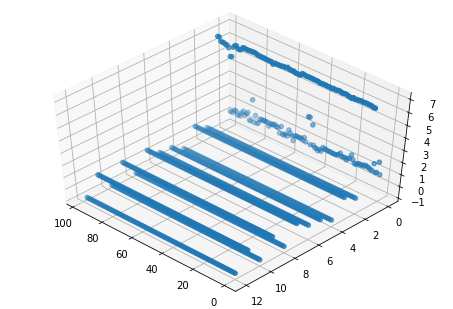

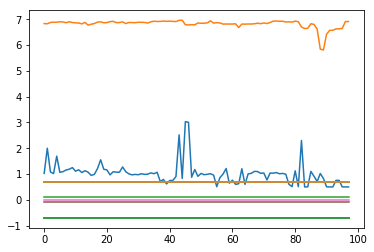

In [31]:
threed_view(next(nt)[:,:],end=98)

In [15]:
fe['vec7'].shape

(68219, 4)

In [6]:
for id_,each in fe.items():
    print(id_)
    print(each.shape)

vec5
(68219, 2)
vec7
(68219, 4)
vec3
(68219, 2)
vec1
(68219, 3)
vec4
(68219, 2)


In [17]:
df_sum_dp=df_sum[df_sum['deploy']==1]

In [18]:
df_sum_dp.shape

(29996, 226)

In [20]:
fe=en_vec(df_sum_dp)

/opt/playground/diaodu/preprocess.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['vec7']=df.vec7.apply(lambda x:vec7_id[x])
/opt/playground/diaodu/preprocess.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['vec5']=df.vec5.apply(lambda x:vec5_id[x])
/opt/playground/diaodu/preprocess.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

In [4]:
rnn=RNN(98,12,128,2,2)
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(rnn.parameters(),lr=0.01)
# optimizer=optim.SGD(rnn.parameters(),lr=0.1)

In [ ]:
#### loss before

def closure():
    optimizer.zero_grad()
    o=rnn(ss)
    loss=loss_fn(o,label)
    loss.backward()

optimizer.step(closure=closure)
loss_fn(rnn(ss),label)
#### training
%%timeit -n 90
optimizer.step(closure)
loss_fn(rnn(s),label)

In [5]:
from keras.utils.generic_utils import Progbar
EPOCH=100
batch_size=80
batch_round=int(dataloader.dataset.label.shape[0]/batch_size)

def save_checkpoint(state_dict,is_best,fn):
    torch.save(state_dict,fn)
    if is_best:
        shutil.copyfile(fn,'./model/diao_du/model_best.pth.tar')

# %load -r 272-289 /data/dotfiles_xy/nvim/plugged/examples/imagenet/main.py

/home/.tbxy09/anaconda/envs/patent-landscape/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


NameError: name 'dataloader' is not defined

In [6]:
dst=Dst(s,df_sum_ins['target'].values)
dataloader=torch.utils.data.DataLoader(dst,batch_size=batch_size,shuffle=True)

NameError: name 's' is not defined

In [112]:
# dataloader training
import time
bar=Progbar(target=batch_round,width=30,interval=0.05)
batch_time=AverageMeter()
load_time=AverageMeter()
# checkpoint=torch.load('./models/diaodu/best/rnn_with_inter_data_0.4954139292240143.pth.tar')
# rnn.load_state_dict(checkpoint['state_dict'])
for epoch in range(EPOCH):
    end=time.time()
    for id_,(s,label) in enumerate(dataloader):
        load_time.update(time.time()-end)
#         checkpoint=torch.load('./models/diaodu/rnn_with_inter_data.pth.tar')
#         rnn.load_state_dict(checkpoint['state_dict'])
#         s=torch.tensor(s,dtype=torch.float)
#         label=torch.tensor(label,dtype=torch.long)
        s=s.to(torch.float)
        label=label.to(torch.long)

        optimizer.zero_grad()
        o=rnn(s)

        loss=loss_fn(o,label)
        loss.backward()
        show_loss=[['loss',loss.data.numpy()]]
#         show_loss+=[['sizeof rnn',getsizeof(rnn.state_dict())]]
#         show_loss+=[['sizeof rnn para',getsizeof(rnn.parameters())]]
        optimizer.step()
    
        batch_time.update(time.time()-end)
        end=time.time()
        show_loss+=[['batch_time',batch_time.avg]]
        show_loss+=[['load_time',load_time.avg]]
        bar.update(id_,show_loss)
    save_checkpoint({'state_dict':rnn.state_dict()},is_best=False,
                    fn='./models/diaodu/rnn_with_inter_data_{}.pth.tar'.format(loss.data.numpy()))
#     rnn.parameters()[1]
#     print(epoch)

  2/374 [..............................] - ETA: 1119:31:57 - loss: 34.4538 - batch_time: -18.0520 - load_time: 0.0118

KeyboardInterrupt: 

In [7]:
###single batch training
ss,label=next(iter(dataloader))

import time
bar=Progbar(target=EPOCH,width=30,interval=0.05)
batch_time=AverageMeter()
load_time=AverageMeter()
checkpoint=torch.load('./models/diaodu/best/rnn_with_inter_data_0.020386777818202972.pth.tar')
rnn.load_state_dict(checkpoint['state_dict'])
for epoch in range(EPOCH):
    end=time.time()
    load_time.update(time.time()-end)
#     checkpoint=torch.load('./models/diaodu/best/rnn_with_inter_data_0.0009381065028719604.pth.tar')
#     rnn.load_state_dict(checkpoint['state_dict'])
    ss=torch.tensor(ss,dtype=torch.float)
    label=torch.tensor(label,dtype=torch.long)
    ss=ss.to(torch.float)
    label=label.to(torch.long)

    optimizer.zero_grad()
    o=rnn(ss)

    loss=loss_fn(o,label)
    loss.backward()
    show_loss=[['loss',loss.data.numpy()]]
#         show_loss+=[['sizeof rnn',getsizeof(rnn.state_dict())]]
#         show_loss+=[['sizeof rnn para',getsizeof(rnn.parameters())]]
    optimizer.step()

    batch_time.update(time.time()-end)
    end=time.time()
#     show_loss+=[['batch_time',batch_time.avg]]
#     show_loss+=[['load_time',load_time.avg]]
    bar.update(epoch,show_loss)
save_checkpoint({'state_dict':rnn.state_dict()},is_best=False,
                    fn='./models/diaodu/rnn_with_inter_data_{}.pth.tar'.format(loss.data.numpy()))
#     rnn.parameters()[1]
#     print(epoch)

NameError: name 'dataloader' is not defined

In [18]:
import torch
checkpoint=torch.load('./models/diaodu/best/rnn_with_inter_data_0.020386777818202972.pth.tar')
rnn.load_state_dict(checkpoint['state_dict'])

In [19]:
save_checkpoint({'state_dict':rnn.state_dict()},is_best=False,
                fn='./models/diaodu/rnn_with_inter_data_{}.pth.tar'.format(loss.data.numpy()))

NameError: name 'save_checkpoint' is not defined

In [13]:
df_machine.cpu.value_counts()

92    3000
32    3000
Name: cpu, dtype: int64

In [15]:
df_machine_copy=df_machine.copy()

In [254]:
df_machine=df_machine_copy

In [256]:
df_machine['cpu_deploy']=pd.Series([],dtype=float)
df_machine['cpu_deploy'].fillna(0,inplace=True)
# df_machine['cpu_deploy']=pd.Series(0,dtype=float)

#### action=update

In [13]:
num_m=2000
loss=np.zeros(num_m)
res=df_machine.cpu.values
op_update=lambda x,index: x/res[index]

In [40]:
index=np.random.randint(6000)
op_update(req_v,index)

NameError: name 'req_v' is not defined

In [13]:
cur=0

col_req=np.arange(98)
col_cpu_req=np.arange(98)*2
col_mem_req=np.arange(98)*2+1
# the one to choose:

In [16]:
cur=0

In [62]:
%%file diaodu/env_stat.py
class Env_stat():    
    def __init__(self,df_machine,df_app_res,verbose):
        self.ret_v=[]
        self.mn=df_machine.copy().reset_index()
        self.app=df_app_res.copy()
        self.verbose=verbose
        self.cur=0
#         self.cpu_limit=self.mn.cpu.values
#         self.mem_limit=self.mn.mem.values
        self.res_cpu=self.mn.cpu.values
        self.res_mem=self.mn.mem.values

        self.col_req=np.arange(98)
        self.col_cpu_req=np.arange(98)*2
        self.col_mem_req=np.arange(98)*2+1
#         pass
    def evaluate(self,cur,choice):
#         pass
        env=self.update(cur,choice)
#         if any(self.update(cur,choice).max(0)>threshold):
        print(''.format(self.env.max(0)))
        if any(env.max(0)>1):
            print('end')
            
        return self.env.sum(0).sum(0)
    def update(self,cur,choice):
#         cur is kind of timmer
        def get_cpu_usage(cur,index):
        #     res_v=res[index]
            ps=self.app[self.col_req].iloc[cur,self.col_cpu_req].astype(float)
            if self.verbose==1:
                ps.apply(lambda x: x/self.res_cpu[index]).plot()
            return ps.apply(lambda x: x/self.res_cpu[index])
        
        def get_mem_usage(cur,index):
        #     res_v=res[index]
            ps=self.app[self.col_req].iloc[cur,self.col_mem_req].astype(float)
            if self.verbose==1:
                ps.apply(lambda x: x/self.res_mem[index]).plot()
            return ps.apply(lambda x: x/self.res_mem[index])
#         op_policy=lambda cur: cur*10+1
        
        # s=df_machine.iloc[cur-3:cur+3][['index','cpu']]
#         choice=op_policy(cur)
        # s=df_machine.iloc[choice-3:choice+3][['index','cpu']]
    
        z=pd.Series(np.zeros(98))
        v=get_cpu_usage(cur,choice)
        map_={0:z,1:v}
        
        s=self.mn.iloc[:][['index','cpu']]
        
        self.ret_v.append(s.apply(lambda x:map_[choice==x['index']],axis=1).values)
        
        if self.verbose==1:
            threed_view(np.sum(ret_v,0)[choice-10:choice+10,:].T,end=100)
        # df_machine['cpu_deploy'].sum(axis=1).plot()
        
        return np.sum(self.ret_v,0)
    
# cur=cur+1
# s.apply(lambda x:choice==x['index'],axis=1)

Writing diaodu/env_stat.py


In [4]:
from env_stat import Env_stat

env=Env_stat(df_machine,df_app_res,df_app_inter,df_ins_sum,verbose=0)
del df_machine,df_app_res,df_app_inter
gc.collect()

/opt/playground/diaodu/env_stat.py:20: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  self.df_a_i=grouped.iid.agg(sum_()).reset_index()


101

In [7]:
# pd.Series(env.update(3,10).max(1)).plot()
x=env.update(276,10)
# .max(1)

In [11]:
x['m'].shape

(6000,)

In [8]:
# pd.Series(env.update(3,10).max(1)).plot()
x=env.evaluate(276,10)
# .max(1)

TypeError: 'int' object is not callable

In [121]:
cur_cpu.shape,cur_mem.shape

((6000, 98), (6000, 98))

In [20]:
%%timeit -n 5
# env.evaluate(793,'machine_55')
env.evaluate(random.randint(1,9000),'machine_55')
# env.evaluate(4046,55)

TypeError: unorderable types: str() > int()

In [30]:
env.env_app[54]
# env.env_app.shape

''

AxisError: axis 1 is out of bounds for array of dimension 1

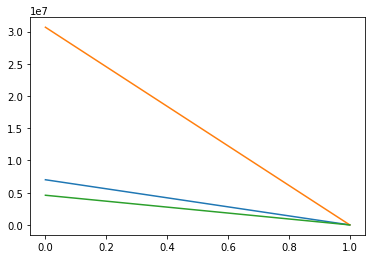

In [5]:
env.evaluate(234,567)

#### mark

In [9]:
env.deploy_state['a'][54]='app_392app_6142app_8905app_1857app_5776app_372app_3432app_3631app_3997app_3984app_1976app_2617app_4614app_2004app_3591app_1256app_8443app_2579app_8755app_2038app_6319app_6332app_2089app_3271app_5798app_7652app_8618app_4850app_996app_4653app_7439app_1300app_5064app_4663app_8324'

AxisError: axis 1 is out of bounds for array of dimension 1

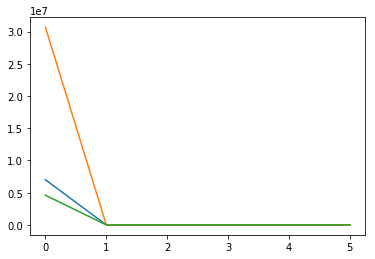

In [13]:
%load -r eve

In [14]:
env.ret_app_infer=[]

d='app_5732 app_3361app_3361app_5732app_3361app_3361app_5732 app_3361'
env.ret_app_infer.append(d)

In [12]:
import re
# text=env.deploy_state['a'][54]
# text=(env.deploy_state['a']+' ').sum()
env.evaluate(2,256)
# r=env.app_inter[['aid','ab']].apply(lambda x: re.findall(x.ab,text),axis=1).apply(lambda x: len(x)!=0)
# r=env.app_inter[['aid','ab']].apply(lambda x: re.findall(x.ab,env.env_app[54]),axis=1).apply(lambda x: len(x)!=0)
# any(r)

(1, 0)

In [6]:
%debug

> /home/.tbxy09/anaconda/envs/patent-landscape/lib/python3.5/site-packages/numpy/core/_methods.py(26)_amax()
     24 # small reductions
     25 def _amax(a, axis=None, out=None, keepdims=False):
---> 26     return umr_maximum(a, axis, None, out, keepdims)
     27 
     28 def _amin(a, axis=None, out=None, keepdims=False):

ipdb> a
a = array([0, 0, 0, ..., 0, 0, 0], dtype=object)
axis = 1
out = None
keepdims = False
ipdb> 
a = array([0, 0, 0, ..., 0, 0, 0], dtype=object)
axis = 1
out = None
keepdims = False
ipdb> a.sum()
a = array([0, 0, 0, ..., 0, 0, 0], dtype=object)
axis = 1
out = None
keepdims = False
ipdb> type(a)
<class 'numpy.ndarray'>
ipdb> 
<class 'numpy.ndarray'>
ipdb> a.shape
a = array([0, 0, 0, ..., 0, 0, 0], dtype=object)
axis = 1
out = None
keepdims = False
ipdb> a.shape
a = array([0, 0, 0, ..., 0, 0, 0], dtype=object)
axis = 1
out = None
keepdims = False
ipdb> exit


In [16]:
for each in env.ret_v_disk[0]:
    if each!=0:
        print(each)

0.1


In [7]:
for each in env.deploy_state['d']:
    if each!=0:
        print(each)
# env.deploy_state['d']

0.1


In [18]:
any(env.deploy_state['d'])>1

False

In [20]:
r.sum()

0

In [5]:
# re.findall('(app_3432).*?(app8324)',(env.env_app+',').sum())
import re
text=(env.deploy_state['a']+' ').sum()

# [re.findall('(app_3432).*?(app_7652).*?(app_8618).*?(app_1300).*?(app_4663).*?(app_8324)',text) for i in range(35242)]
# [re.findall('app_3432',text) for i in range(35242)]
t=['app_3432','app3222','app6422']
if any([re.findall(each,text) for each in t]):
    print('y')
[re.findall(each,text) for each in t]

KeyError: 'a'

In [44]:
(env.env_app+',').sum()

',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,app_392app_6142app_8905app_1857app_5776app_372app_3432app_3631app_3997app_3984app_1976app_2617app_4614app_2004app_3591app_1256app_8443app_2579app_8755app_2038app_6319app_6332app_2089app_3271app_5798app_7652app_8618app_4850app_996app_4653app_7439app_1300app_5064app_4663app_8324,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,app_4321,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [30]:
env.env_app[54]

''

In [31]:
%%timeit -n 3

mid=env.mn.mid[random.randint(1,6000)]
env.update(random.randint(1,9000),mid)

1.16 s ± 57.3 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [10]:
%%timeit -n 1
mid=env.mn.mid[random.randint(1,6000)]
# mid=env.mn.mid[random.randint(1,6000)]
env.evaluate(random.randint(1,9000),mid)

TypeError: unorderable types: str() > int()

In [4]:
text='app_5732appp5223app_1148app_1148app_353app_1148app_1148'

In [42]:
# re.findall('(app_3432).*?(app8324)',(env.env_app+',').sum())
import re
# text=(env.deploy_state['a']+' ').sum()

# [re.findall('(app_3432).*?(app_7652).*?(app_8618).*?(app_1300).*?(app_4663).*?(app_8324)',text) for i in range(35242)]
# [re.findall('app_3432',text) for i in range(35242)]
t=['app_3432','app3222','app6422','5732']
if any([re.findall(each,text) for each in t]):
    print('y')
[re.findall(each,text) for each in t]

y


[[], [], [], ['5732']]

In [231]:
# %%file ut.py
text='app5732 app5732app5223app1148'+'app1148app353'+'app_1148app_1148'

text

# re.findall('(app_3432).*?(app8324)',(env.env_app+',').sum())
import re
# text=(env.deploy_state['a']+' ').sum()

# [re.findall('(app_3432).*?(app_7652).*?(app_8618).*?(app_1300).*?(app_4663).*?(app_8324)',text) for i in range(35242)]
# [re.findall('app_3432',text) for i in range(35242)]
# t=['app_3432','app3222','app6422','5712',env.app_inter.ab[5],
t= ['app5732[^()]*app1148[^()]*app1148[^()]*app_1148[^( )]*app_1148']
# t= ['app5732.*?app1148']
#    [^( )]+app_1148']
# t=['app_3432','app3222','app6422','5712',env.app_inter.ab[5],'app_5732.*?app_1148.*?app_1148']
if any([re.findall(each,text) for each in t]):
    print('y')
[re.findall(each,text) for each in t]

Writing ut.py


In [279]:
%run ut.py

-----------
['app_5732app_5732app_5223app_1148app_1148app353app_1148app_1148'] app_5732[^(  )]*app_1148[^(  )]*app_1148[^(  )]*app_1148[^( )]*app_1148
[] app_5732[^(  )]*app_1148[^(  )]*app_1148[^(  )]*app_1148[^( )]*app_1148
[] app_5732[^(  )]*app_1148[^(  )]*app_1148[^(  )]*app_1148[^( )]*app_1148
[] app_5732[^(  )]*app_1148[^(  )]*app_1148[^(  )]*app_1148[^( )]*app_1148
-----------
['app_5732 app_5732app_5732app_5223app_1148app_1148app353app_1148app_1148'] app_5732.*app_1148
['app_5732 app_5732app_5223app_1148app_1148'] app_5732.*app_1148
['app_5732app_5732app_5223app_1148'] app_5732.*app_1148
['app_5732app_5732app_5223app_453app_1148'] app_5732.*app_1148
-----------
['app_5732 app_5732app_5732app_5223app_1148'] app_5732?.*?app_1148
['app_5732 app_5732app_5223app_1148'] app_5732?.*?app_1148
['app_5732app_5732app_5223app_1148'] app_5732?.*?app_1148
['app_5732app_5732app_5223app_453app_1148'] app_5732?.*?app_1148
-----------
['app_5732app_5732app_5223app_1148app_1148app353app_1148app_

AttributeError: 'NoneType' object has no attribute 'group'

In [117]:
re.findall(t[0],text)

[]

#### working on 

In [429]:
import re
# env.app_inter.ab
a=r'cat_342[^()]*?dog_539'
a=r'cat_342(?!cat_342)[^()]*?dog_539'
a=r'cat_342(?!cat_342$)[^()]*?dog_539'
###need add verbose to ignore the white space
r=re.compile("""(^.*?) # group1
(cat_342[^(|)]*?dog_539) # group2
""",re.VERBOSE)
r=re.compile("""(^.*?)
((cat_342
[^(|)]*?dog_539)
[^(|)]*?dog_539)
""",re.VERBOSE)
# a=r'^.*cat_342.*?dog_539'
# a=r'cat_342.*?(?!cat_342).*?dog_539'
# a='<.*?>'
b='cat_342dog_123cat_342cat_675dog_539|dog_567|dog_539cat_539cat_539cat_123dog_539'
b='cat_342dog_123cat_342dog_539cat_342dog_539cat_342cat_675dog_539|dog_567|dog_539cat_539cat_539cat_123dog_539'
# b='cat_342|dog_123|cat_342'
# b='dog_123|cat_342|dog_567|dog_539cat_539cat_539cat_123dog_539'
# r=re.compile(a)
# r.match(b).group(2)
if r.match(b):
    print('y')
else:
    print('n')
# re.findall(r'BLA[^(BLA)]+LOOK', 'BLA text text text  text text text BLA text text text text LOOK text text text BLA text text BLA')
# r.match(b).group(2)
r.findall(b)

y


[('',
  'cat_342dog_123cat_342dog_539cat_342dog_539',
  'cat_342dog_123cat_342dog_539')]

#### regex

#### https://docs.python.org/2/howto/regex.html#greedy-versus-non-greedy

In [170]:
import re
c=['foo.bar', 'autoexec.bat', 'auto.batf','sendmailcf', 
   'printers.conf',
   'printers..conf']
# p=re.compile('(.*)[.](.*$)')
p=re.compile('.*[.][^b](.*$)')
# p=re.compile(r'.*[.][^(bat)]*$')
p=re.compile(r'(.*?)[.](.*)')
#verison 1
p=re.compile(r'(.*?)[.](?!bat$)([^.]*$)')
p=re.compile(r'(^[^.]*)[.](?!bat$)([^.]*$)')
p=re.compile(r'(^[^.]*)[.](?!bat$)([^.]*)')
p=re.compile(r'(^[^.]*)[.](?!bat$|bar)([^.]*)')

#### ^ and $ very useful, set a boundary for the start and end, filter parted matched case

In [364]:
g_target=[p.match(each).group(2) for each in c if p.match(each)]
[p.match(each).group(0) for each in c if p.match(each)]

['auto.batf', 'printers.conf', 'printers.']

In [132]:
pp=re.compile(r'^[^.]*')

In [133]:
[pp.match(g) for g in g_target]

[<_sre.SRE_Match object; span=(0, 4), match='batf'>,
 <_sre.SRE_Match object; span=(0, 4), match='conf'>,
 <_sre.SRE_Match object; span=(0, 4), match='conf'>]

In [472]:
p.match(c[1])

In [39]:
import re
# idx=env.ab.aid.app_100.index[1]
for g,v in env.app_inter.groupby('aid'):
    if g=='app_5732':
#         pass
        print(v)
    if re.findall(g,text):
        [print(re.findall(each,text)) for each in v.ab if re.findall(each,text)]
# [re.findall(v,text) for g,v in self.app_inter.groupby('aid') if re.findall(g,text)]
# env.ab.iloc[idx]
# env.ab.aid
# env.app_inter.iloc[idx]

         aid                        ...                                                                         ab
2   app_5732                        ...                          app_5732[^( )^(app_5732)]+app_3361[^( )^(app_5...
3   app_5732                        ...                          app_5732[^( )^(app_5732)]+app_1919[^( )^(app_5...
4   app_5732                        ...                          app_5732[^( )^(app_5732)]+app_2749[^( )^(app_5...
5   app_5732                        ...                          app_5732[^( )^(app_5732)]+app_1148[^( )^(app_5...
6   app_5732                        ...                          app_5732[^( )^(app_5732)]+app_2482[^( )^(app_5...
7   app_5732                        ...                          app_5732[^( )^(app_5732)]+app_6234[^( )^(app_5...
8   app_5732                        ...                          app_5732[^( )^(app_5732)]+app_8017[^( )^(app_5...
9   app_5732                        ...                          app_5732[^( )^(

In [ ]:
%%timeit -n 1
mid=env.mn.mid[random.randint(1,6000)]
# mid=env.mn.mid[random.randint(1,6000)]
env.update(random.randint(1,9000),mid)

In [2]:
%debug

> /home/.tbxy09/anaconda/envs/patent-landscape/lib/python3.5/site-packages/IPython/core/magics/execution.py(1021)timeit()
   1019 
   1020         timefunc = timeit.default_timer
-> 1021         number = int(getattr(opts, "n", 0))
   1022         default_repeat = 7 if timeit.default_repeat < 7 else timeit.default_repeat
   1023         repeat = int(getattr(opts, "r", default_repeat))

ipdb> exit


In [176]:
env.env_app.max()

'app_7922app_1932app_7608app_8821app_7530app_6089'

In [29]:
# %%timeit -n 5
import re
r=env.app_inter[['aid','ab']].apply(lambda x: re.findall(x.ab,(env.env_app+'|').sum()),axis=1).apply(lambda x: len(x)!=0)

r[r==True]

Series([], dtype: bool)

In [30]:
any(r.values)

False

In [31]:
r=np.zeros(10)
r[1]=1
any(r)

True

In [28]:
(env.env_app+'|').sum()

'||||||||||||||||||||||||||||||||||||||||||||||||||||||app_1844app_2833|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [18]:
env.env_app.shape

(6000,)

In [192]:
env.env_app[2]

''

In [136]:
env.env_app.shape

(6000, 98)

In [82]:
env.env.shape

(6000, 98)

In [78]:
any(env.env.max(1)>1)

False

In [38]:
env.env.max(1).plot

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [33]:
np.argmax(cur_v)

10

In [89]:
env.

AttributeError: 'Env_dst' object has no attribute 'env'

In [75]:
env.ret_v

[]

In [14]:
def get_ret(cur,index):
#     res_v=res[index]
    ps=df_app_res[col_req].iloc[cur,col_cpu_req].astype(float)
    if verbose==1:
        ps.apply(lambda x: x/res[index]).plot()
    return ps.apply(lambda x: x/res[index])

In [15]:
op_policy=lambda cur: cur*10+1
get_ret(cur,op_policy(cur))
# cur+=1

NameError: name 'verbose' is not defined

In [16]:
df_machine=df_machine.reset_index()
ret_v=[]

In [17]:
ret_v=[]

In [25]:
/len ret_v

6

In [343]:
ret_v

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

In [ ]:
# np.hstack(ret_v).sum(axis=1).shape
# pd.DataFrame(np.sum(ret_v,0)[:10,:].T).plot()
# pd.DataFrame(np.sum(ret_v,0)[:10,:].T).plot()
threed_view(np.sum(ret_v,0)[choi:,:].T,end=100)


In [351]:
np.sum?

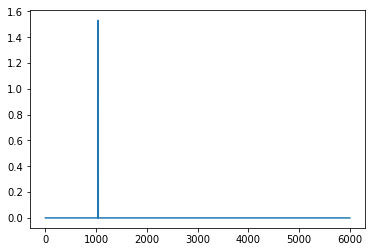

In [287]:
ret_v.sum(axis=1).plot()

In [304]:
torch(ret_v).cat

In [279]:
df_machine.shape

(6000, 16)

In [280]:
ret_v.shape

(6000, 98)

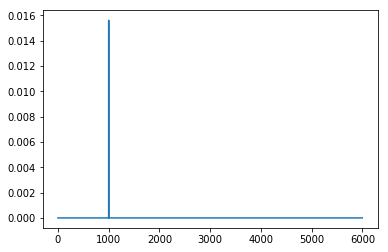

In [267]:
df_machine.cpu_deploy.plot()

In [265]:
df_machine.cpu_deploy.apply(lambda x: x+1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
5970    1.0
5971    1.0
5972    1.0
5973    1.0
5974    1.0
5975    1.0
5976    1.0
5977    1.0
5978    1.0
5979    1.0
5980    1.0
5981    1.0
5982    1.0
5983    1.0
5984    1.0
5985    1.0
5986    1.0
5987    1.0
5988    1.0
5989    1.0
5990    1.0
5991    1.0
5992    1.0
5993    1.0
5994    1.0
5995    1.0
5996    1.0
5997    1.0
5998    1.0
5999    1.0
Name: cpu_deploy, Length: 6000, dtype: float64

In [245]:
ret_v.sum(axis=1)


908    0.000000
909    0.000000
910    0.000000
911    6.435937
912    0.000000
913    0.000000
dtype: float64

In [215]:
map_[1]

In [190]:
df_machine.head()

,index,mid,cpu,mem,disk,p,m,pm,cpu_en,mem_en,disk_en,p_en,m_en,pm_en,target,cpu_deploy
0,0,machine_1,32,64,600,7,3,7,0,0,0,0,0,0,0,0.0
1,1,machine_2,32,64,600,7,3,7,0,0,0,0,0,0,0,0.0
2,2,machine_3,32,64,600,7,3,7,0,0,0,0,0,0,0,0.0
3,3,machine_4,32,64,600,7,3,7,0,0,0,0,0,0,0,0.0
4,4,machine_5,32,64,600,7,3,7,0,0,0,0,0,0,0,0.0


In [164]:
gen=lambda x,y:np.arange(x*y).reshape(x,y)
li=[]
# li.append(gen(5,3))
# li.append(gen(5,3))
# li.append(gen(5,3))
# li.append(gen(5,3))
# li+=gen(5,3)
x=np.ones(5,dtype=int)*4
y=np.ones(5,dtype=int)*3
[li.append(gen(x,y)) for x,y in zip(x,y)]
# {x:y for x,y in zip(x,y)}


np.vstack(li).shape

[None, None, None, None, None]

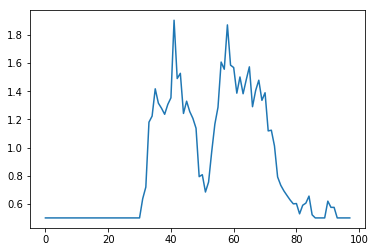

In [96]:
df_app_res[col_req].iloc[cur,col_cpu_req].astype(float).plot()
df_app_res[col_req].iloc[cur,col_cpu_req].astype(float).apply(lambda x: x/res[index])
cur=cur+1
# .iloc[:,col_cpu_req].apply(lambda x:x)

In [73]:
df_app_res[0].iloc[:,0]

0         0.5
1         0.5
2         0.5
3         0.5
4         0.5
5         0.5
6         0.5
7         0.5
8         0.5
9           4
10        0.5
11        0.5
12       0.91
13        0.5
14        0.5
15        0.5
16        0.5
17        0.5
18        0.5
19        0.5
20        0.5
21      2.092
22        0.5
23        0.5
24        0.5
25        0.5
26        0.5
27        0.5
28        0.5
29      0.903
        ...  
9308        4
9309        4
9310      0.5
9311      0.5
9312    1.832
9313    1.009
9314      0.5
9315      0.5
9316      0.5
9317      0.5
9318      0.5
9319      0.5
9320        4
9321      0.5
9322      0.5
9323    0.862
9324      0.5
9325    0.572
9326    0.519
9327    2.516
9328    1.122
9329    1.303
9330      0.5
9331     0.56
9332      0.5
9333    1.148
9334    2.054
9335      0.5
9336      0.5
9337      0.5
Name: 0, Length: 9338, dtype: object

In [33]:
df_machine.cpu_deploy.apply(op_update)

TypeError: <lambda>() missing 1 required positional argument: 'index'

In [15]:
loss=df_machine['cpu_deploy'].sum()

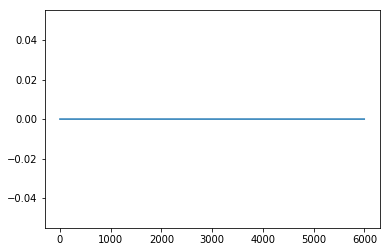

In [44]:
df_machine.cpu_deploy.cumsum().plot()

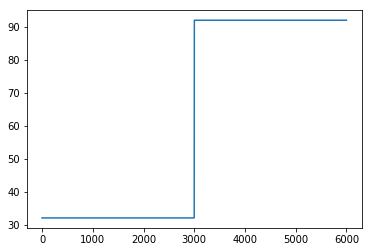

In [46]:
df_machine.cpu.plot()

4.41985321045

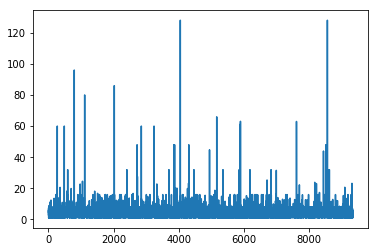

In [94]:
col=[]
col=list(range(98))
col_op=list(2*np.array(col)+1)
col_db=list(2*np.array(col))
tmp_vc=df_app_res[col].values[:,col_db].astype(float).max(axis=1)
tmp_vm=df_app_res[col].values[:,col_op].astype(float).max(axis=1)
plt.plot(tmp_v)
tmp_v[1]
# tmp_v=df_app_res[col].values[:,col_op].astype(float).sum(axis=1)
# plt.figure()
# plt.plot(tmp_v)
# df_app_res.cpu.str.split('|').astype(float).sum()

In [96]:
np.argmax(tmp_vc),np.argmax(tmp_vm)

(793, 4046)

In [102]:
tmp_vm[4046]

128.0

In [15]:
tmp_v.shape

(9338,)

In [98]:
df_machine.cpu.max()

92

In [99]:
df_machine.mem.max()

288